# **Ridge , Lasso , Elasticnet Regression with Agerual Forest Fire Dataset**

In [87]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## Algerian Forest Fire Dataset

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012. The dataset includes 11 attribues and 1 output attribue (class) The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

Dataset columns:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations

2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42

3. RH : Relative Humidity in %: 21 to 90

4. Ws :Wind speed in km/h: 6 to 29

5. Rain: total day in mm: 0 to 16.8 FWI Components

6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

8. Drought Code (DC) index from the FWI system: 7 to 220.4

9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

10. Buildup Index (BUI) index from the FWI system: 1.1 to 68

11. Fire Weather Index (FWI) Index: 0 to 31.1

12. Classes: two classes, namely Fire and not Fire

## **Dataset Load**

In [88]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [89]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [90]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## **Data Cleaning**

In [92]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [93]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [94]:
df.iloc[122]

day            Sidi-Bel Abbes Region Dataset
month                                    NaN
year                                     NaN
Temperature                              NaN
 RH                                      NaN
 Ws                                      NaN
Rain                                     NaN
FFMC                                     NaN
DMC                                      NaN
DC                                       NaN
ISI                                      NaN
BUI                                      NaN
FWI                                      NaN
Classes                                  NaN
Name: 122, dtype: object

In [95]:
df.iloc[123]

day                    day
month                month
year                  year
Temperature    Temperature
 RH                     RH
 Ws                     Ws
Rain                 Rain 
FFMC                  FFMC
DMC                    DMC
DC                      DC
ISI                    ISI
BUI                    BUI
FWI                    FWI
Classes          Classes  
Name: 123, dtype: object

**Observation :**

1. Till index 121 , all the data belongs to Bejaia Region
2. From index 124 , all the data belongs to Sidi-Bel Region
3. The row 123 contains the repeating columns names


So, we create a column named 'Region' and add the label 0 for Bejaia Region and 1 for Sidi-Bel region. and add the data accordingly. 

In [96]:
df.loc[:122,'Region']=0
df.loc[122:,'Region']=1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [97]:
df['Region'] = df['Region'].apply(lambda x : int(x))

In [98]:
df['Region'].dtype

dtype('int64')

In [99]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [100]:
## Remove the rows with null values
df = df.dropna().reset_index(drop=True)

In [101]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [102]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [103]:
## Remove the rows with repeatitive columns names as in place of column value. 
df = df.drop(122).reset_index(drop=True)

In [104]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4    RH          243 non-null    object
 5    Ws          243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [106]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

**Observation :** 
The column name 'Classes  ' has some extra space in it.

In [107]:
## fix spaces in column name
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

***Change the dtype of all the columns as per need , mostly integer datatype would be best suitable for regression analysis***

In [108]:
df.iloc[[1]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0


 These ('day', 'month', 'year', 'Temperature', 'RH', 'Ws') columns has basically int values but in str format. Change it to integer type. 

In [109]:
def change_dtype(col):
    df[col] = df[col].apply(lambda x : int(x))

for col in ['day', 'month', 'year', 'Temperature', 'RH', 'Ws']:
    change_dtype(col)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


Remaining these ('Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes') columns have float value but in str format. Change it to float

In [110]:
obj = [feature for feature in df.columns if df[feature].dtypes == 'O']

In [111]:
for i in obj:
    if i != 'Classes':
        df[i] = df[i].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


## **EDA**

In [112]:
df.to_csv('Algerian_forest_fires_clean_dataset.csv',index=False)

In [113]:
## drop the unnecessary columns irrelevant to the problem solution
df1 = df.drop(['day','month','year'],axis=1)

In [114]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [115]:
# Categories in 'Classes'
df1['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [116]:
## Encoding the categorical variable 'classes' for ease of regression

df1['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [117]:
df1['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [118]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

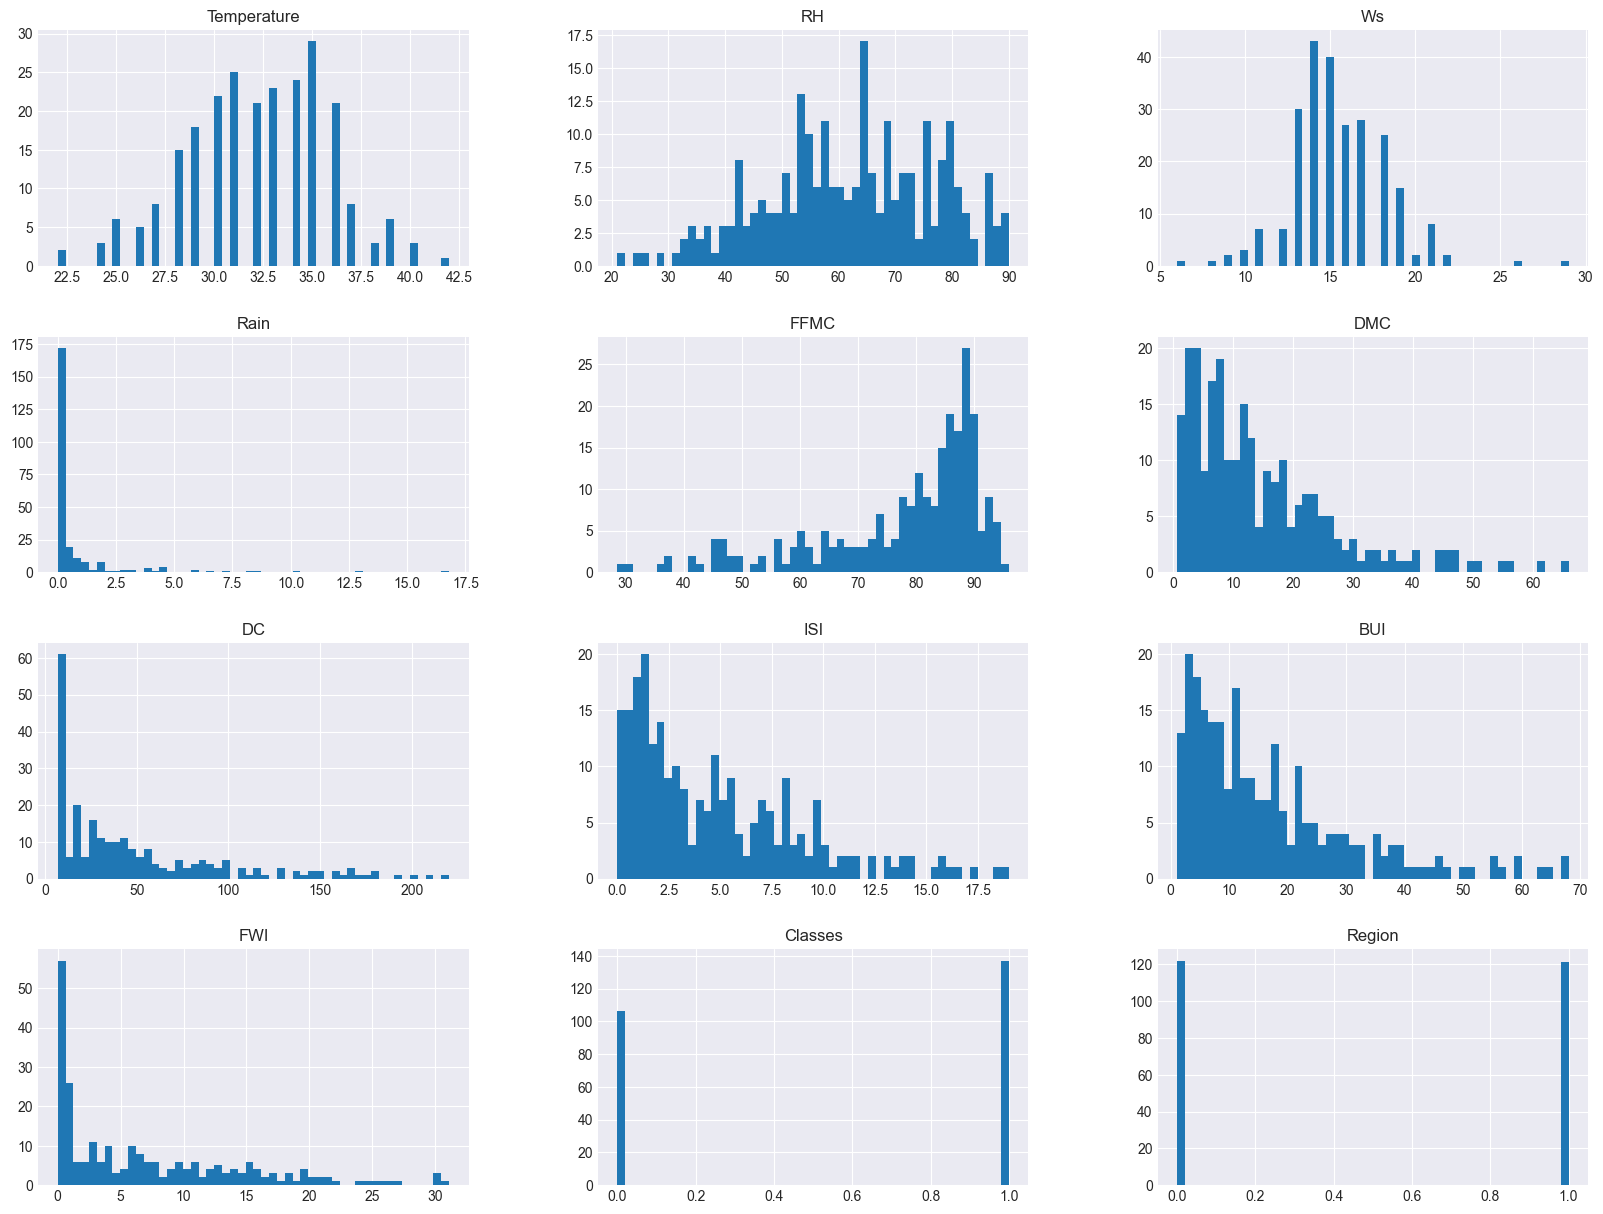

In [119]:
## Density for all features
plt.style.use('seaborn-v0_8-darkgrid')
df1.hist(bins=50,figsize=(20,15))
plt.show()

In [120]:
## Percentage of Pie-Chart
percentage = df1['Classes'].value_counts(normalize=True) * 100

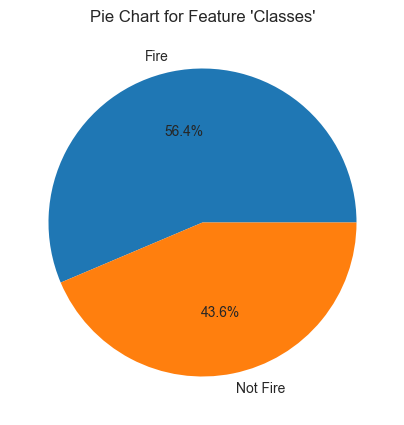

In [121]:
## Plotting Pie-Chart
classlabels = ['Fire','Not Fire']
plt.figure(figsize=(5,5))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie Chart for Feature 'Classes'")
plt.show()


In [122]:
## Correlation
df1.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

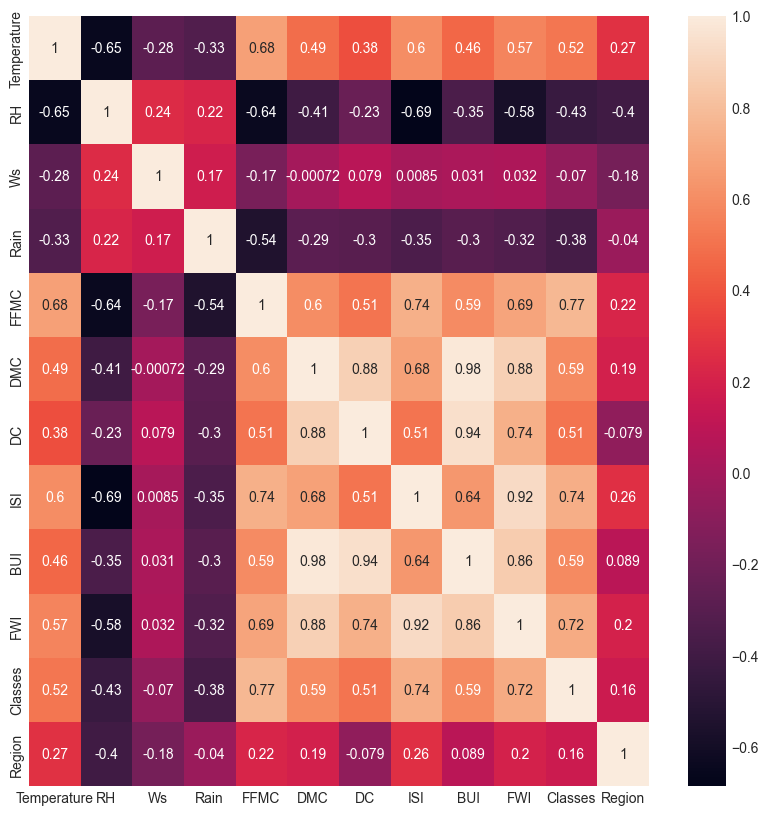

In [123]:
## visualize the correlation of features
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True)

<Axes: xlabel='FWI'>

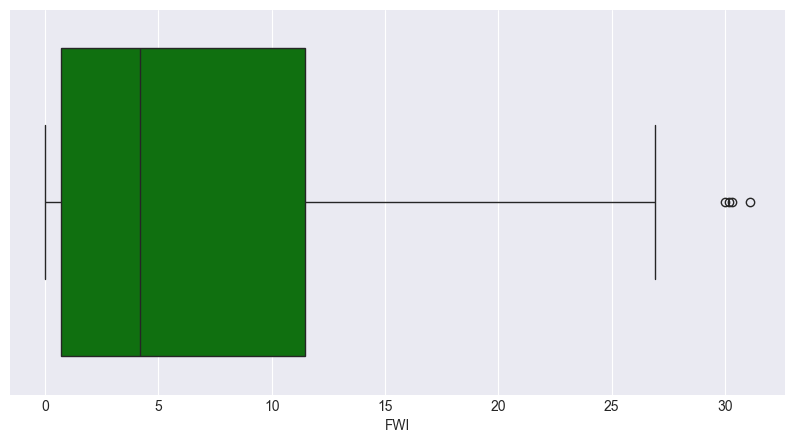

In [124]:
## Box plot to visualize the outliers
plt.figure(figsize=(10,5))
sns.boxplot(df1['FWI'],orient='h',color='green')

Text(0.5, 1.0, 'Fire Analysis for Bejaia Region Dataset ')

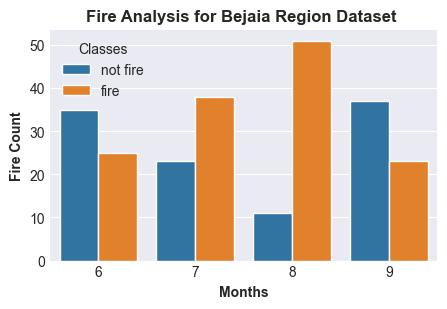

In [125]:
## Monthly Fire Analysis


df['Classes'] = np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

dftemp = df.loc[df['Region']]==0
plt.subplots(figsize=(5,3))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.xlabel('Months',weight='bold')
plt.ylabel('Fire Count',weight='bold')

plt.title('Fire Analysis for Bejaia Region Dataset ',weight='bold')

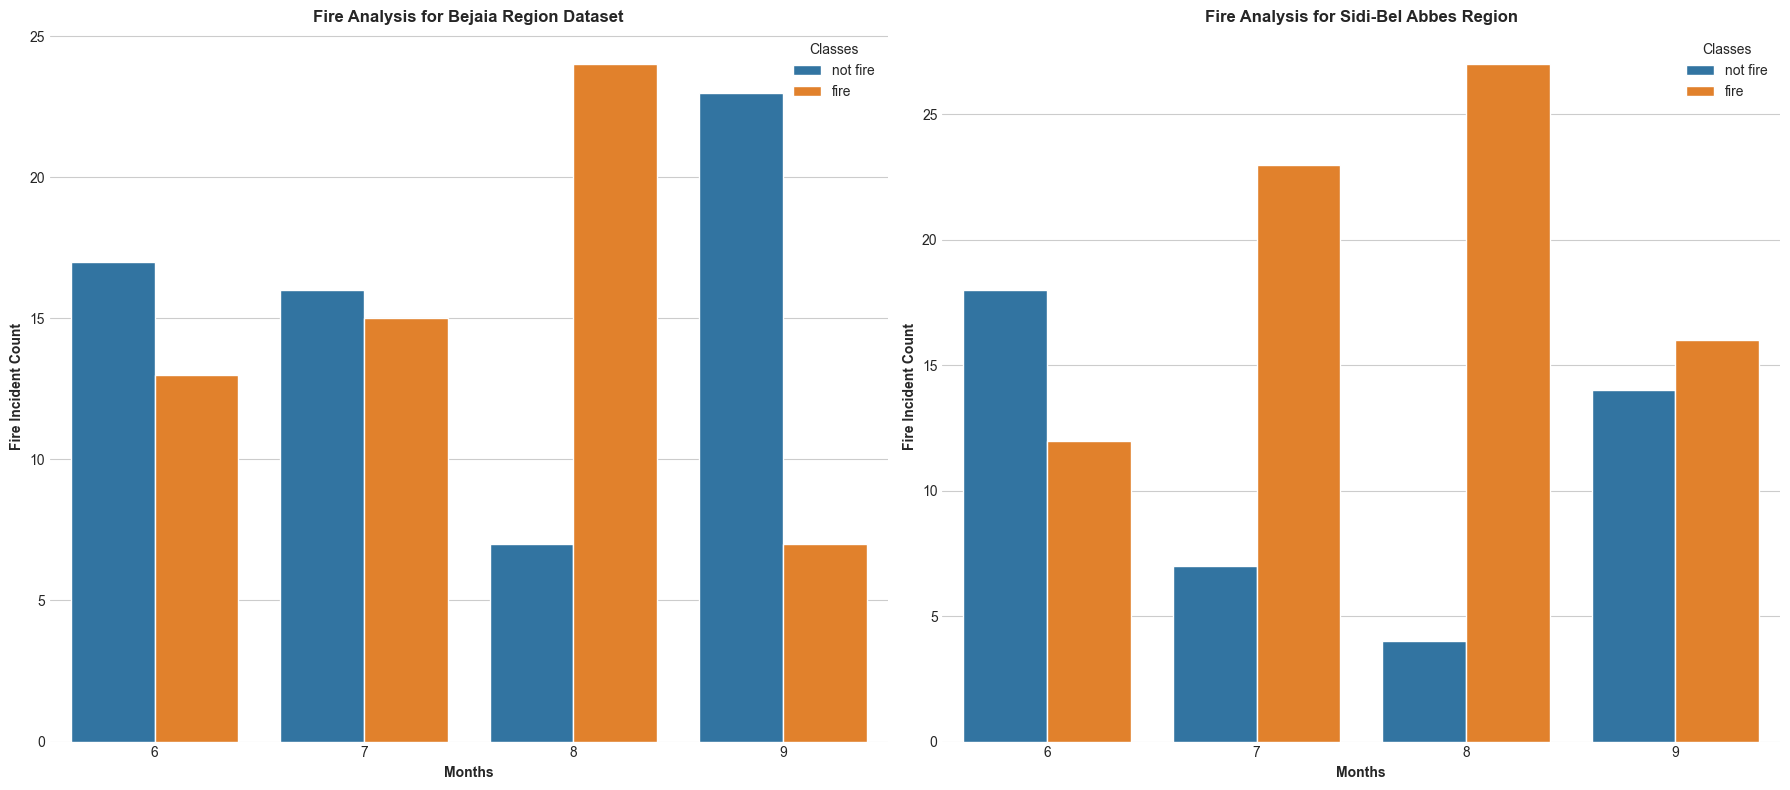

In [126]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Set the overall style
sns.set_style('whitegrid')

# Filter data for Bejaia Region (0)
dftemp1 = df[df['Region'] == 0]
sns.countplot(x='month', hue='Classes', data=dftemp1, ax=axes[0])
axes[0].set_title('Fire Analysis for Bejaia Region Dataset', weight='bold')
axes[0].set_xlabel('Months', weight='bold')
axes[0].set_ylabel('Fire Incident Count', weight='bold')

# Filter data for another region (1)
dftemp2 = df[df['Region'] == 1]
sns.countplot(x='month', hue='Classes', data=dftemp2, ax=axes[1])
axes[1].set_title('Fire Analysis for Sidi-Bel Abbes Region', weight='bold')
axes[1].set_xlabel('Months', weight='bold')
axes[1].set_ylabel('Fire Incident Count', weight='bold')

# Display the plot
plt.tight_layout()
plt.show()


#### **Observation :**

1. In the month of **August** , most number of fire incidents has happend for both the regions. 
2. Very high amount of fire incidents has happend in the month of **June** , **July**, **August**. and very less in **September**

## **Feature Scaling**

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [128]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [129]:
## Independent and Dependent Features
X = df1.drop('FWI',axis=1)
y = df1['FWI']

print(X.shape)
print(y.shape)

(243, 11)
(243,)


In [130]:
## train_test split of Data
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)


(182, 11) (61, 11)
(182,) (61,)


In [131]:
## Feature Selection based on Correlation

X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

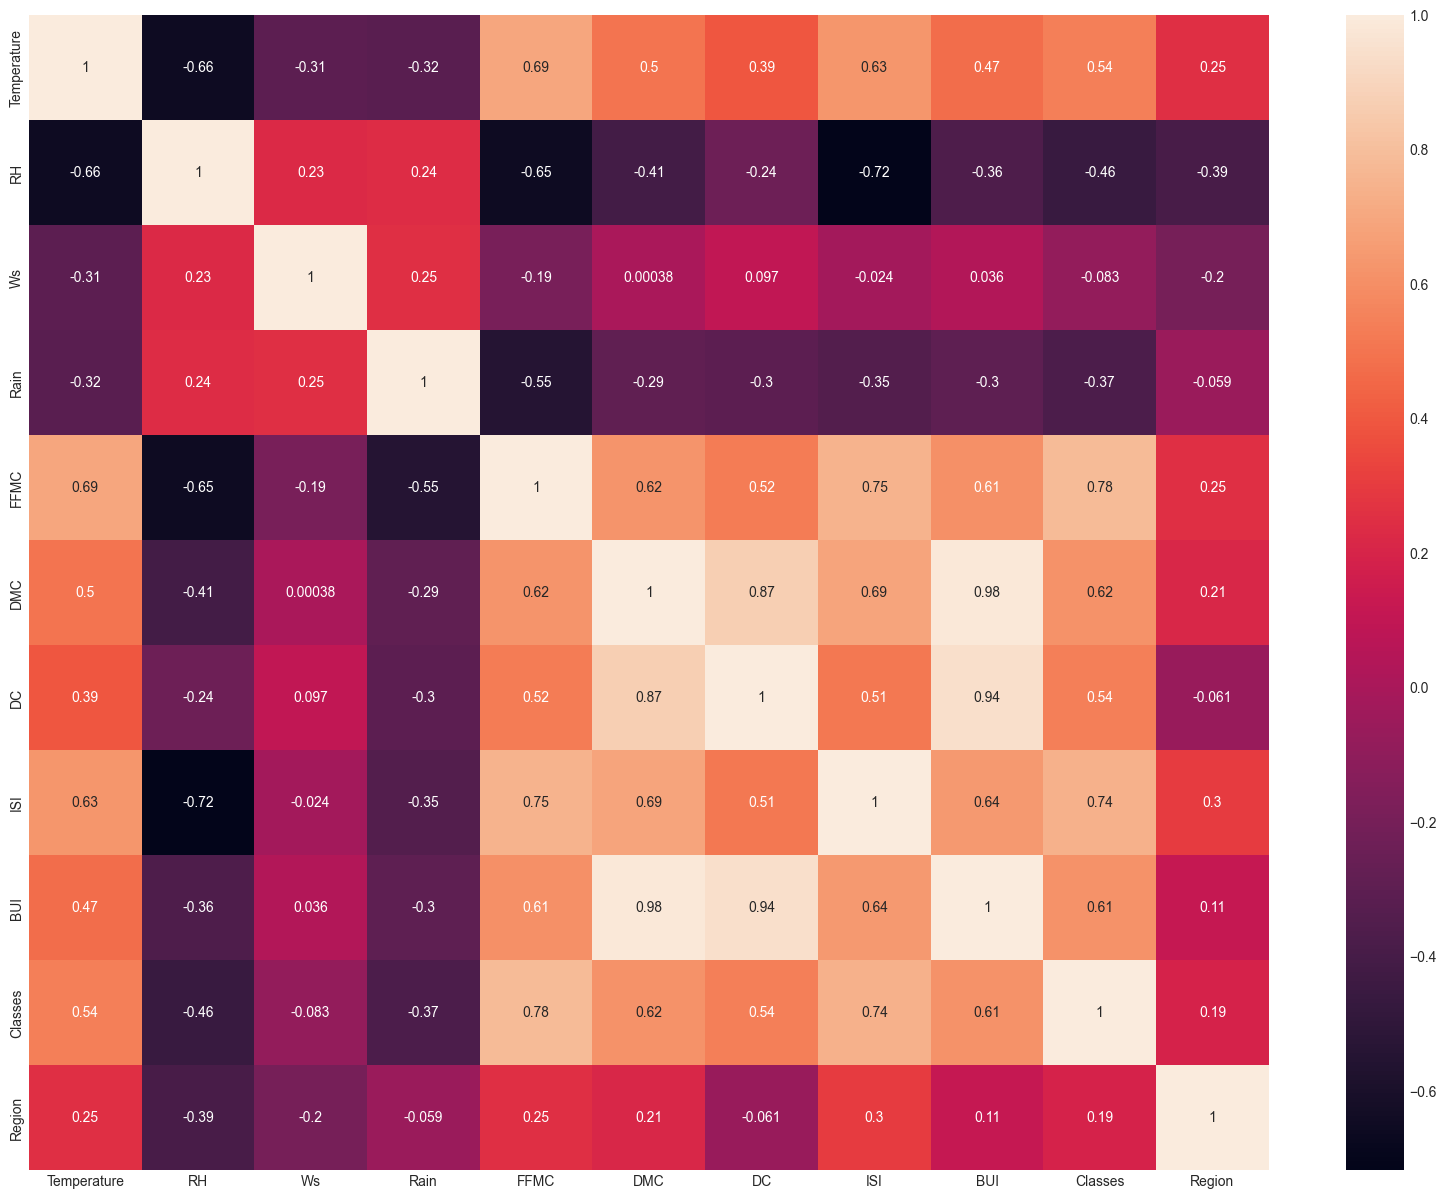

In [132]:
## Check for Multicollinearity
plt.figure(figsize=(20,15))
corr = X_train.corr()
sns.heatmap(corr,annot=True)


In [133]:
## Avoid Features which are way too much Correlated i.e, high +ve Correlation
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr



In [134]:
## threshold is set by domain-expertise
high_corr_feature=correlation(X_train,0.85)

In [135]:
## Drop features with correlation above 85% from train data
X_train.drop(high_corr_feature,axis=1,inplace=True)


In [136]:
## Drop features with correlation above 85% from test data
X_test.drop(high_corr_feature,axis=1,inplace=True)

In [137]:
X_train.shape,X_test.shape

((182, 9), (61, 9))

In [138]:
## Feature Scaling or Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [139]:
X_train_scaled[:5]

array([[-0.84284248,  0.78307967,  1.29972026, -0.33727373, -0.12805583,
        -0.88272888, -0.62963326, -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, -0.29048728, -1.21758569,
        -0.86687565, -0.93058524, -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, -0.38406017,  1.15703067,
         0.61540157,  2.7271388 ,  0.90553851,  1.01105006],
       [-0.03121639, -0.15191892,  0.9200267 , -0.24370083, -0.03726168,
        -0.27237944, -0.60648311, -1.10431526, -0.98907071],
       [-0.03121639, -1.0201319 , -0.59874754, -0.05655505, -0.00932501,
        -0.60529731, -0.69908371, -1.10431526, -0.98907071]])

In [140]:
X_test_scaled[:5]

array([[-0.30175842,  0.11522353, -0.21905398, -0.38406017,  0.63321824,
        -0.04250757,  0.20377222,  0.90553851, -0.98907071],
       [ 0.23932564, -0.55263261, -0.9784411 , -0.38406017,  0.73798073,
        -0.38335206,  0.36582328,  0.90553851, -0.98907071],
       [-1.11338451, -0.28549015,  0.9200267 ,  0.64524166, -0.97313989,
        -0.91443534, -0.83798463, -1.10431526,  1.01105006],
       [ 0.50986767, -0.28549015, -0.9784411 , -0.29048728,  0.1303583 ,
         0.31419016, -0.62963326, -1.10431526,  1.01105006],
       [-0.57230045,  0.18200914, -0.59874754, -0.38406017,  0.54242408,
         0.10017152, -0.07402961,  0.90553851,  1.01105006]])

In [141]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

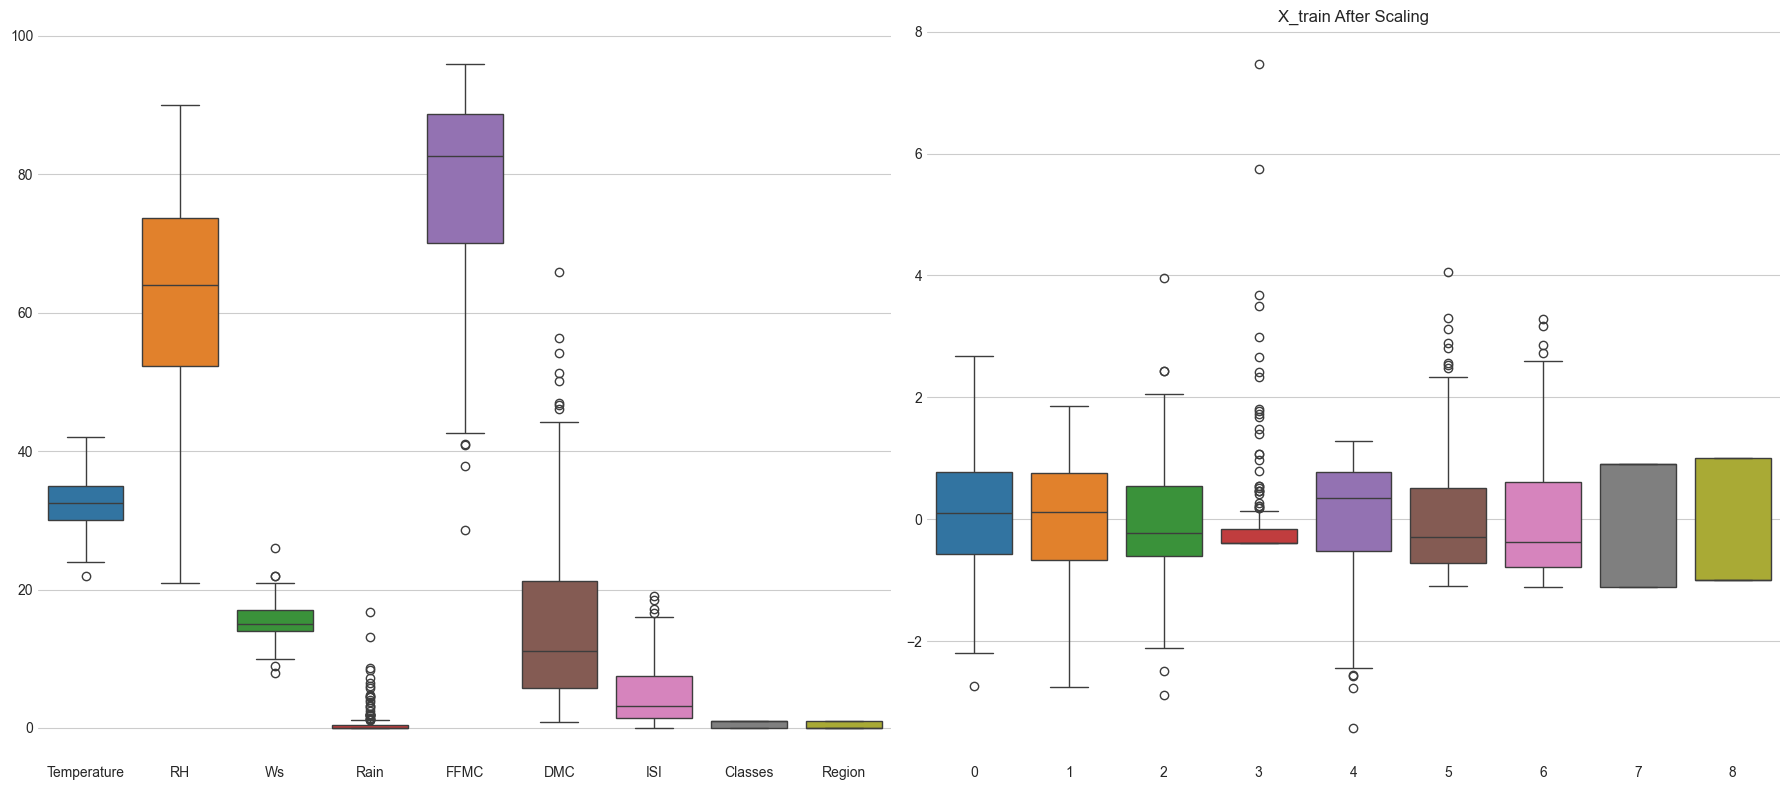

In [142]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Set the overall style
plt.style.use('seaborn-v0_8-darkgrid')

sns.boxplot(data = X_train, ax=axes[0])
plt.title("X_train Before Scaling")
# axes[0].set_xlabel('Months', weight='bold')
# axes[0].set_ylabel('Fire Incident Count', weight='bold')

sns.boxplot(data = X_train_scaled, ax=axes[1])
plt.title("X_train After Scaling")

# Display the plot
plt.tight_layout()
plt.show()


## **Model Training**

In [143]:
from sklearn.linear_model import LinearRegression , Ridge, Lasso , ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score


Mean Absolute Error : 0.546823646524997
r2_score : 0.9847657384266951


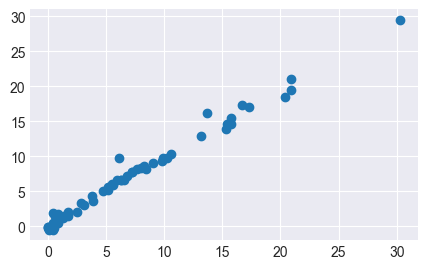

In [144]:
## Simple Linear Regression Model
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print(f'Mean Absolute Error : {mae}')
print(f'r2_score : {score}')

plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(5,3))
plt.scatter(y_test,y_pred)

Since there is chances that linear regression model with too much good accuracy is tend to be overfitted on dataset and thus perform bad for new data. so lets try something different. 

Mean Absolute Error : 0.5642305340105691
r2_score : 0.9842993364555513


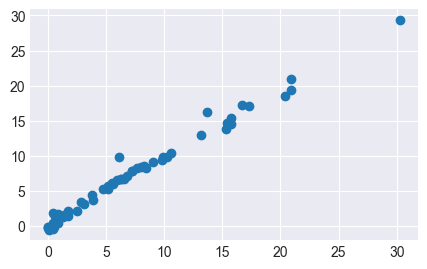

In [145]:
## Ridge Regression Model

ridgereg = Ridge()
ridgereg.fit(X_train_scaled,y_train)
y_pred2 = ridgereg.predict(X_test_scaled)
mae2 = mean_absolute_error(y_test,y_pred2)
score2 = r2_score(y_test,y_pred2)

print(f'Mean Absolute Error : {mae2}')
print(f'r2_score : {score2}')

plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(5,3))
plt.scatter(y_test,y_pred2)


Mean Absolute Error : 1.133175994914409
r2_score : 0.9492020263112388


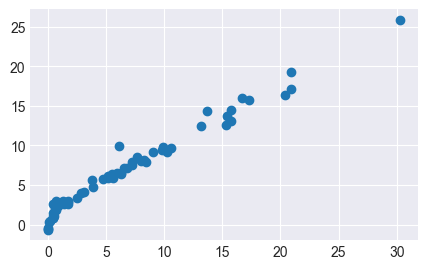

In [146]:
## Lasso Regression Model

lassoreg = Lasso()
lassoreg.fit(X_train_scaled,y_train)
y_pred3 = lassoreg.predict(X_test_scaled)
mae3 = mean_absolute_error(y_test,y_pred3)
score3 = r2_score(y_test,y_pred3)

print(f'Mean Absolute Error : {mae3}')
print(f'r2_score : {score3}')

plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(5,3))
plt.scatter(y_test,y_pred3)

Mean Absolute Error : 1.8822353634896
r2_score : 0.8753460589519703


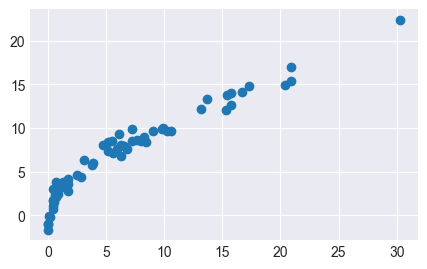

In [147]:
## Elasticnet Regression Model

elasticreg = ElasticNet()
elasticreg.fit(X_train_scaled,y_train)
y_pred4 = elasticreg.predict(X_test_scaled)
mae4 = mean_absolute_error(y_test,y_pred4)
score4 = r2_score(y_test,y_pred4)

print(f'Mean Absolute Error : {mae4}')
print(f'r2_score : {score4}')

plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(5,3))
plt.scatter(y_test,y_pred4)

## **Hyperparameter Tuning**

In [148]:
from sklearn.linear_model import LassoCV , RidgeCV , ElasticNetCV
from sklearn.metrics import mean_absolute_error, r2_score


Mean Absolute Error with Ridge : 0.5642305340105691
r2_score with Ridge: 0.9842993364555513
Mean Absolute Error with RidgeCV : 0.5642305340105691
r2_score with RidgeCV: 0.9842993364555513


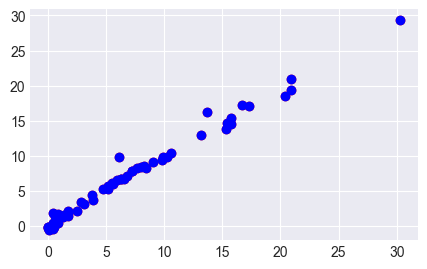

In [149]:
## Ridge Regression Model with Hyperparameter Tuning

ridgereg2 = RidgeCV(cv=5)
ridgereg2.fit(X_train_scaled,y_train)
y_pred5 = ridgereg2.predict(X_test_scaled)
mae5 = mean_absolute_error(y_test,y_pred5)
score5 = r2_score(y_test,y_pred5)

print(f'Mean Absolute Error with Ridge : {mae2}')
print(f'r2_score with Ridge: {score2}')
print(f'Mean Absolute Error with RidgeCV : {mae5}')
print(f'r2_score with RidgeCV: {score5}')

plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(5,3))
plt.scatter(y_test,y_pred2,color='r')
plt.scatter(y_test,y_pred5,color='b')


In [150]:
ridgereg2.alpha_

1.0

In [151]:
ridgereg2.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

Mean Absolute Error with Lasso : 1.133175994914409
r2_score with Lasso: 0.9492020263112388
Mean Absolute Error with LassoCV : 0.6199701158263431
r2_score with LassoCV: 0.9820946715928275


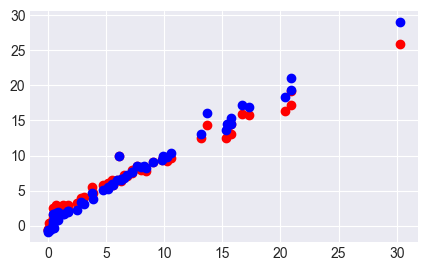

In [152]:
## Lasso Regression Model with hyperparameter tuning

lassoreg2 = LassoCV(cv=5)
lassoreg2.fit(X_train_scaled,y_train)
y_pred6 = lassoreg2.predict(X_test_scaled)
mae6 = mean_absolute_error(y_test,y_pred6)
score6 = r2_score(y_test,y_pred6)

print(f'Mean Absolute Error with Lasso : {mae3}')
print(f'r2_score with Lasso: {score3}')

print(f'Mean Absolute Error with LassoCV : {mae6}')
print(f'r2_score with LassoCV: {score6}')

plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(5,3))
plt.scatter(y_test,y_pred3,color='r')
plt.scatter(y_test,y_pred6,color='b')

In [153]:
lassoreg2.alpha_

0.05725391318234408

In [154]:
lassoreg2.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [155]:
lassoreg2.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

In [156]:
lassoreg2.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}

Mean Absolute Error with ElasticNet : 1.8822353634896
r2_score with ElasticNet: 0.8753460589519703
Mean Absolute Error with ElasticNetCV : 1.8822353634896
r2_score with ElasticNetCV : 0.8753460589519703


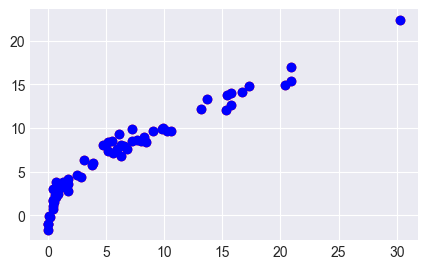

In [157]:
## Elasticnet Regression Model with Hyperparameter Tunning

elasticreg2 = ElasticNetCV(cv=5)
elasticreg2.fit(X_train_scaled,y_train)
y_pred7 = elasticreg.predict(X_test_scaled)
mae7 = mean_absolute_error(y_test,y_pred7)
score7 = r2_score(y_test,y_pred7)

print(f'Mean Absolute Error with ElasticNet : {mae4}')
print(f'r2_score with ElasticNet: {score4}')
print(f'Mean Absolute Error with ElasticNetCV : {mae7}')
print(f'r2_score with ElasticNetCV : {score7}')

plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(5,3))
plt.scatter(y_test,y_pred4,color='r')
plt.scatter(y_test,y_pred7,color='b')

In [158]:
elasticreg2.alpha_

0.04311146156383891

In [159]:
elasticreg2.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

In [160]:
elasticreg2.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

## **Model Pickeling**



In [161]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(elasticreg,open('elasticreg.pkl','wb'))
pickle.dump(elasticreg2,open('elasticregcv.pkl','wb'))
pickle.dump(lassoreg,open('lassoreg.pkl','wb'))
pickle.dump(lassoreg2,open('lassoregcv.pkl','wb'))
pickle.dump(ridgereg,open('ridgereg.pkl','wb'))
pickle.dump(ridgereg2,open('ridgeregcv.pkl','wb'))

# Using tensorflow 



In [168]:
X_train.shape

(182, 9)

In [162]:
from sklearn.preprocessing import power_transform
import tensorflow as tf

In [3]:
# (x_train,y_train),(x_test,y_test)=tf.keras.datasets.boston_housing.load_data()
# y_train=tf.reshape(y_train,[-1,1])
# y_test=tf.reshape(y_test,[-1,1])

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [182]:
# **Ridge Regression**

class Ridge_reg:
  
    def __init__(self):
        self.weights=tf.Variable(tf.zeros([9,1],dtype=tf.float64))
        #self.bias=tf.Variable(0,dtype=tf.float64)
        self.optimizer=tf.optimizers.Adam(0.01)
        self.metric=tf.keras.metrics.RootMeanSquaredError()
        self.regularization_rate=0.8
        
    def predict(self,x):
        #print(x.dtype,self.weights.dtype)
        return tf.matmul(x,self.weights)
    
    def compute_loss(self, x, y):
        mse_loss = tf.reduce_mean((self.predict(x) - y) ** 2)
        reg_loss = self.regularization_rate * tf.reduce_sum(self.weights ** 2)
        return mse_loss + reg_loss

    
    @tf.function
    def update(self,x,y):
        with tf.GradientTape() as tape:
            loss = self.compute_loss(x, y)
        gradients = tape.gradient(loss, [self.weights])
        self.optimizer.apply_gradients(zip(gradients, [self.weights]))

    
    def train(self,x,y,val_x,val_y,epochs):
        
        x = tf.convert_to_tensor(x, dtype=tf.float64)
        y = tf.convert_to_tensor(y, dtype=tf.float64)
        val_x = tf.convert_to_tensor(val_x, dtype=tf.float64)
        val_y = tf.convert_to_tensor(val_y, dtype=tf.float64)
    
        
        for e in range(epochs):
            self.update(x,y)
            if e%20:
                pred=self.predict(val_x)
                pred_train=self.predict(x)
                ss_res = tf.reduce_sum(tf.square(val_y - pred))
                ss_tot = tf.reduce_sum(tf.square(val_y - tf.reduce_mean(val_y)))
                r2 = 1 - ss_res / ss_tot
                print("\rtesting_RMSE={},training_RMSE={},R2 score={}".format(self.metric(val_y,pred),self.metric(y,pred_train),r2),end='')
                



In [183]:
model=Ridge_reg()
model.train(X_train,y_train,X_test,y_test,12000)

testing_RMSE=7.410638809204102,training_RMSE=7.4106550216674805,R2 score=-60.4086535673493765

In [82]:
y_pred = model.predict(X_test)

In [171]:
y_pred

array([ 8.22340505e+00,  7.75252922e+00, -2.54117416e-01,  4.35589319e+00,
        6.69135945e+00,  1.36202538e+00,  2.03864111e+00,  7.79328670e+00,
        1.72547890e+00,  3.33158516e+00,  4.13723043e-01,  9.75001593e+00,
        9.33180880e+00,  1.70522541e+01,  1.85133518e+01,  1.24250301e+00,
        1.85818589e+00, -2.19341618e-02,  7.18794479e+00,  3.06137615e+00,
        1.43702876e+00,  2.31135272e-01,  6.57677437e+00,  3.31761969e-01,
        2.10846121e+01,  5.11915298e+00,  5.93220317e+00,  9.80969813e+00,
       -6.46764212e-02,  9.81330986e+00,  6.64475980e+00, -4.53909646e-01,
        1.04015941e+01,  1.45820244e+01,  1.47807316e+00,  4.33773546e-01,
        2.04109845e+00,  6.08454570e+00, -4.65467631e-01, -3.05185642e-01,
        6.68439528e+00,  1.79727675e+00,  8.59237254e+00, -2.66715046e-01,
        1.54439592e+01,  8.32647113e+00,  8.25849719e+00,  1.42038134e+00,
        1.29740729e+01,  1.21912915e+00,  2.95190998e+01,  5.55199228e+00,
        1.72874204e+01,  

In [172]:
model.compute_loss(X_test,y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=44.57254808852279>